<a href="https://colab.research.google.com/github/arbi11/CompEM1/blob/master/1_pandas_intro_RF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. import the necessary packages

In [0]:

import numpy as np
import pandas as pd
import seaborn as sns
import scipy


# 2. Specify the filepath if you don't want to work with relative paths

In [2]:
! git clone https://github.com/arbi11/CompEM1.git

Cloning into 'CompEM1'...
remote: Enumerating objects: 24, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 24 (delta 8), reused 2 (delta 0), pack-reused 0
Unpacking objects: 100% (24/24), done.


In [3]:
! ls

CompEM1  sample_data


In [4]:
cd CompEM1/


/content/CompEM1


In [5]:
! ls

1_pandas_intro.ipynb  indian_liver_patient.csv	README.md
2_RF.ipynb	      NLP.ipynb


In case you have a file on your local system

file_path = 'D:\\Documents\\Codes\\Kabeer\\Liver\\'


# 3. read the data -- into a pandas dataframe 

In [0]:

# 3. read the data -- into a pandas dataframe 
data_frame = pd.read_csv('indian_liver_patient.csv')


# 4. Some data description and analysis


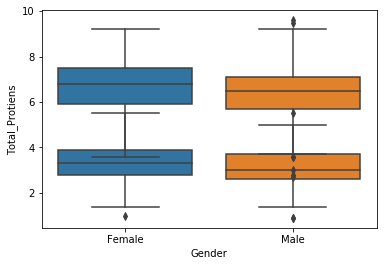

In [9]:
# 4. Some data description and analysis
data_frame.columns # prints the name of all the columns in ur table

data_frame.dtypes # the data type of all the columns

data_frame.describe() # basic statistics about your data

data_frame.describe(include= 'all') # basic statistics about your data

# count the number of males & females
data_frame['Gender'].value_counts()

# to convert categorical variables to quantitative (one-hot encoding)
dataframes = pd.get_dummies(data_frame['Gender'])

data_frame.head() # prints out first 5 rows of the data

sns.boxplot(x = 'Gender', y = 'Albumin', data= data_frame)
sns.boxplot(x = 'Gender', y = 'Total_Protiens', data= data_frame)


# 5. Data correlation


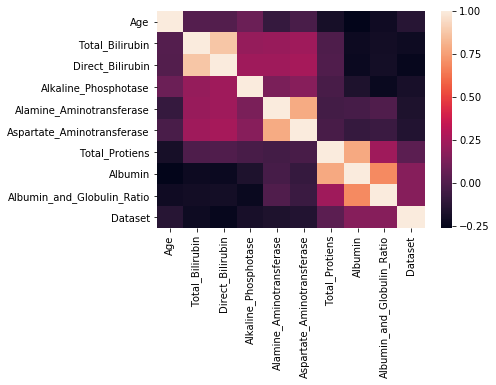

In [10]:

# 5. Data correlation
data_frame.corr(method= 'pearson')

sns.heatmap(data_frame.corr(method= 'pearson'))

data_frame['Albumin_and_Globulin_Ratio'].isna()


index = data_frame['Albumin_and_Globulin_Ratio'].index[data_frame['Albumin_and_Globulin_Ratio'].apply(np.isnan)]


# 6. Data manipulation

filling in the missing values in column - 'Albumin_and_Globulin_Ratio'

In [0]:
data_frame = data_frame.fillna(data_frame.mean())

Another way of doing it by just concentrating that particular column

In [0]:
data_frame['Albumin_and_Globulin_Ratio'].fillna((data_frame['Albumin_and_Globulin_Ratio'].mean()), inplace= True)

In [14]:
data_frame.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.318492,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.947064,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


# 7. One - hot encoding

Converting the 'Gender' column to two numerical values (1-hot) 'Gender_Male' & 'Gender_female'

In [0]:
data_frame2 = pd.get_dummies(data_frame, prefix=['Gender'])


In [25]:
data_frame2.head()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,Gender_Female,Gender_Male
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,1,1,0
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,1,0,1
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89,1,0,1
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00,1,0,1
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40,1,0,1


Another way of doing the same ...i guess (havent tried...check for yourself)

In [0]:
# from sklearn.preprocessing import LabelEncoder

In [0]:
# encoder = LabelEncoder()


# 8. Seperating Attributes/Features & Labels

In [0]:
X = data_frame2.loc[:, data_frame2.columns != 'Dataset']
# X=data[['Age', 'Total_Bilirubin', 'petal length', 'petal width']]  # Features
y = data_frame2['Dataset']  # Labels

# 9. Train - Test split

In [0]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

# 10. Random Forest Model



1.   change the 'n_estimators' parameter
2.   There are others as well like max_tree_len.....etc...check the documentation
[sklearn-RF](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)



In [0]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=750)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

Predict/ Check on the Test set 

In [48]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7314285714285714
